In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns

In [2]:
df_preprocessed = pd.read_csv("data\dataset_knn_neighbors.csv",  encoding='utf-8')

# Linear Regression (with interaction)

In [3]:
y = df_preprocessed['price']

In [4]:
X = df_preprocessed.drop(columns=['price'])

##### Adding interaction terms

In [5]:
X_lineal = X.copy()

In [6]:
X_lineal['surface_x_bedrooms'] = X_lineal['habitableSurface']*X_lineal['bedroomCount']
X_lineal['surface_x_bathrooms'] = X_lineal['habitableSurface']*X_lineal['bathroomCount']
X_lineal['bed_x_bath'] = X_lineal['bedroomCount']*X_lineal['bathroomCount']
X_lineal['bath_x_toilet'] = X_lineal['bathroomCount']*X_lineal['toiletCount']

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split


X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lineal, y, test_size=0.2, random_state=42)


In [18]:
numerical_cols_X = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_X.remove('price')


In [19]:
y_train_l_transformed = np.log1p(y_train_l)
y_test_l_transformed = np.log1p(y_test_l)

In [20]:

X_train_scaled = X_train_l.copy()
X_test_scaled = X_test_l.copy()


scaler = StandardScaler()


X_train_scaled[numerical_cols_X] = scaler.fit_transform(X_train_l[numerical_cols_X])
X_test_scaled[numerical_cols_X] = scaler.transform(X_test_l[numerical_cols_X])



In [21]:
model = LinearRegression()
# model.fit(X_train_scaled, y_train_l)
model.fit(X_train_scaled, y_train_l_transformed)
print("TRAINING SET: ")
print("R² Score :", model.score(X_train_scaled, y_train_l_transformed))


TRAINING SET: 
R² Score : 0.7571934451269879


In [ ]:

y_pred_l_transformed = model.predict(X_test_scaled)
y_pred_l = np.expm1(y_pred_l_transformed)



In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test_l, y_pred_l))
print("Mean Absolute Error:", mean_absolute_error(y_test_l, y_pred_l))
print("R² Score :", r2_score(y_test_l, y_pred_l))



Mean Squared Error: 9047068122.14803
Mean Absolute Error: 63545.465500780636
R² Score : 0.6653672306606336


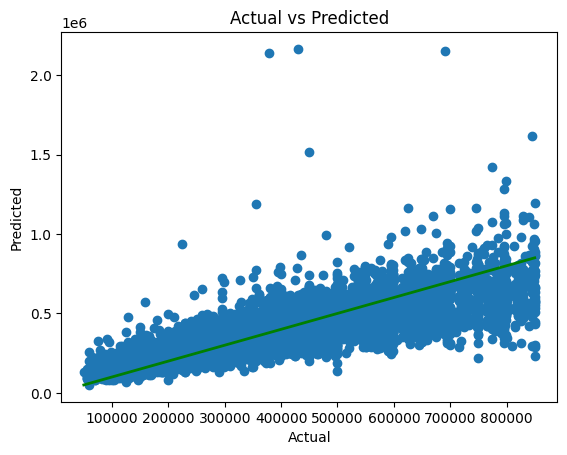

In [24]:
plt.scatter(y_test_l, y_pred_l)
plt.plot([y_test_l.min(), y_test_l.max()], [y_test_l.min(), y_test_l.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

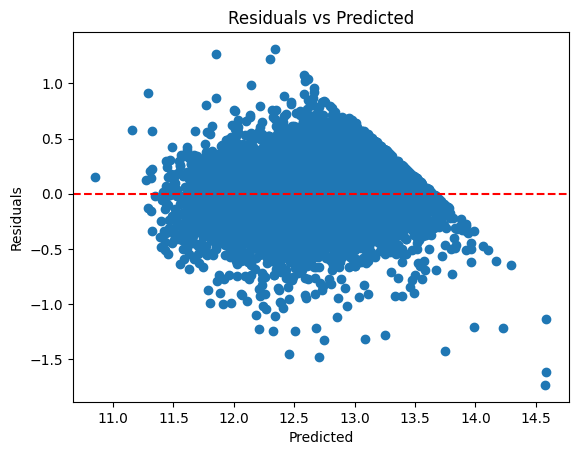

In [25]:
residuals_transformed = y_test_l_transformed - y_pred_l_transformed

plt.scatter(y_pred_l_transformed, residuals_transformed)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

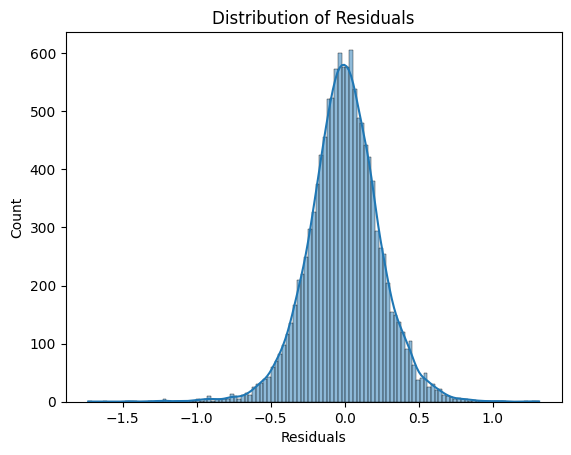

In [26]:
sns.histplot(residuals_transformed, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

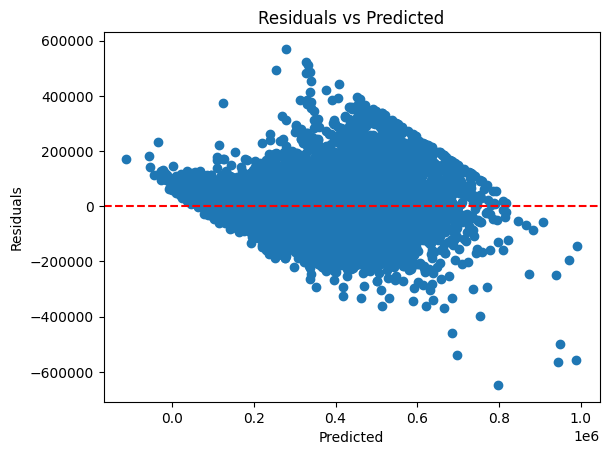

In [15]:
residuals_l = y_test_l - y_pred_l
plt.scatter(y_pred_l, residuals_l)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

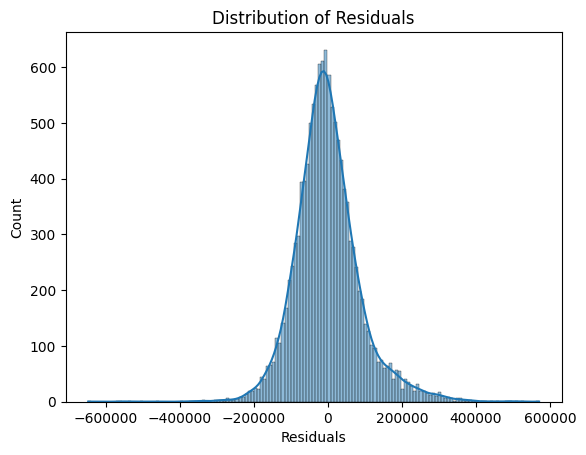

In [16]:

sns.histplot(residuals_l, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()